# Challenge - Building a machine learning package

⚠️ Write your code in your **text editor** (Atom or VSCode), not in a notebook !

Jupyter notebooks are great tools for exploring data, drafting a model and starting to code your ideas. But once the idea is clear, and you want to make a product out of it, it's time to leave the Jupyter Notebook environment for something more industrializable.

In this challenge, we are going to build a minimalist machine learning model to predict wine quality, which we well make available as a pip installable package.

We will work with the following dataset : http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv (no need to download it yourself)

⚠️ And as we want to simulate a real world scenario, where you're not working alone, **you should realize this work by teams.**

We emphasis that the goal of this challenge is absolutely not to make the best possible machine learning model, but to industrialize it.
Please set your teams (3-4 pers), and let's go!

## Project setup

### 1. Setup your GitHub repository

⚠️⚠️⚠️ **DO NOT CREATE THE FOLDER FOR THIS PROJECT INSIDE YOUR `vivadata-student` FOLDER** <br>
⚠️⚠️⚠️ **CREATE IT INSIDE YOUR `code` FOLDER** <br>
⚠️⚠️⚠️ **JUST GO IN YOUR `code` FOLDER RIGHT NOW FROM YOUR TERMINAL AND STAY THERE** <br>
⚠️⚠️⚠️ **THIS IS VERY IMPORTANT**

Make 1 repository by team. 

The process to follow is :
- One (and **only one**) member of the team creates a github repository, named `wine-quality-predictor`. Just go to Github and click the **New** button to create a repo. Make it a private one. Initialize it with a README file.

- Once this is done, the owner of the repository can invite his/her teammates to join the repository as collaborators. You can find this in the "Manage Access" section of the GitHub repo Settings:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1L_1u9quKIjiDK_-73d9pnQLsMR2dVlBN">
</p>

### 2. Clone your repository locally

- All members of the team can get your newly created repository's URL from the main GitHub page:

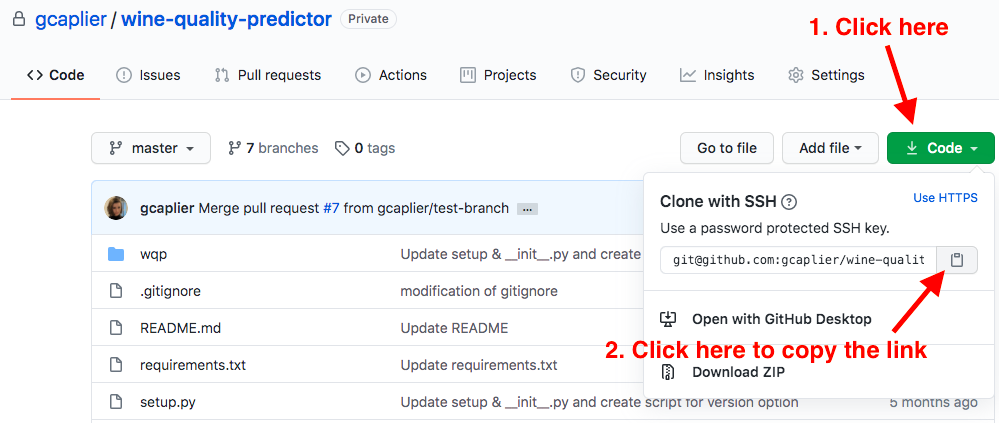

- Then all members of the team can use the git command line to get a local copy of the remote repository:

```bash
git clone git@github.com:xxx/wine-quality-predictor
```

Now, each member of your team should have the same (empty) code locally. You and your teammates are now ready to build great things!


## Environment setup and project structure

#### Environment setup

You should have virtualenv installed on your machine. If not, please follow the steps [here](https://python-guide-pt-br.readthedocs.io/fr/latest/dev/virtualenvs.html).

At the root of your project, create a virtualenv and activate it:

```bash
cd wine-quality-predictor
virtualenv venv
source venv/bin/activate # Pour macOS et Linux
source venv/Scripts/activate # Pour Windows
```

Once the environment is activated, you should see something like that : 
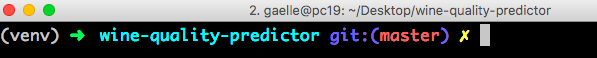

### Create the setup.py file

⚠️ **Only 1 person in the team will do this part, then push it on the repo, and the other team members will get it via pulling the changes.**

To do that, create a new branch from the master branch:

```bash
git checkout -b project_setup
```


Now, create the `setup.py` file at the root of your project, containing minimal informations about your project (package name, author, version, dependencies). You can just copy-paste the contents given below.

Contents of the file setup.py:


```python
import setuptools

setuptools.setup(
    name='wqp',
    version='1.0.0',
    author='my_email@email.com',
    description='Wine quality predictor - a packaged machine learning algorithm to predict wine quality',
    packages=setuptools.find_packages(),
    install_requires=[
        "scikit-learn==0.22.1",
        "pandas==1.0.1"
    ]
)
```

Still at the root of your project, create a file named `requirements.txt`. This file will list all the dependencies you need to develop your package: the package dependencies themselves, plus eventually other dependencies that you need as a developer (ex. jupyter, IPython, matplotlib, etc...), but that the package itself doesn't require.
Let's keep the package as small as possible!

Contents of the file `requirements.txt` (just copy-paste the following lines in the file, without the comments) :

```bash
-e . # This line will tell pip to install your package as editable mode, convenient for development.
ipython # just if you need ipython to be installed in your virtual environment.
```

#### Project structure

As we will package this project into a deliverable that we can distribute, we need to follow a certain project structure. As a reminder, python modules are either python files (.py), or folders, containing at least an \_\_init\_\_.py file.
As the goal of this lab is not to spend time debating about the architecture of the package, let's juste assume we want the following structure:


```
wine-quality-predictor
│   setup.py
│   requirements.txt
│   .gitignore
│
└───wqp
    │   __init__.py

```

All the code that we are going to write will end up in the folder __wqp__. This folder is actually our package, named with the initials of our project.

At this stage, you can check your changes by executing this command: 
```
git status
```

You should see a list of new files. Virtual environment should not be commited to the remote repository, so you should add them in the `.gitignore` file.

- Create a file named `.gitignore` at the root of your directory
- Add the following line to it :
```
venv/*
```

You can now commit and push those changes on the remote repository:

```bash
git status # to check the list of changes and the files you want to add
git add setup.py requirements.txt .gitignore # to add the files we want to commit
git commit -m 'setup project dependencies' # always put a clear commit message!
git push --set-upstream origin project_setup # push your local changes to the remote repository
```

- **Once you've pushed your change, you can create a pull request from GitHub, to merge those changes in the master branch.**
- For that, click on "New Pull Request" from the "Pull requests" tab of your GitHub project:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=18ItMW9BOi2sa3UKBztHbDxNy3PAxzHLN">
</p>

- Choose "master" as base branch, and "setup_project" as head branch, and create the pull request. 
- Make a clear pull request message when you're asked
- Chose someone from your team to review it by adding them as reviewer!

Once this is done, your teammates can go to their GitHub page, and open the pull request for review. Once the review is done, you can close and merge the pull request.
This will automatically update the code of the master branch.


Now, your teammates can get your code, and you can all start working as a team!
Execute the following commmands (every team member) to get an up-to-date version of the master branch:

```bash
git checkout master # to be sure to be on the master branch
git pull # to retrieve the latest changes from master
```


Now, you can all finish to setup your environment by running the command: 
```bash
pip install -r requirements.txt
```

And that's it, your environment is now ready, you can start coding!

### Implementing the code

We are implementing here a very simple machine learning model. The tasks we have to do in order to train our model can be splitted into:
- Fetching the training data
- Fitting the model
- Evaluating the model

We will hence split the code into corresponding modules. Below is the global architecture of our package. One member of the team should create the sub-folder `wqp` and add the needed files (empty for now).

```
wine-quality-predictor
│   README.md
│   setup.py
│   requirements.txt
│   .gitignore
│
└───wqp
    │   __init__.py
    │   data_access.py
    │   evaluation.py
    │   ml.py
    │   workflow.py
```

Each module is responsible of 1 task:
- data_access.py will fetch the data, split it into train and test datasets.
- evaluation.py will compute model metrics
- ml.py will be the definition of our model, as a Scikit-Learn pipeline.
- workflow.py will be the global orchestration of our steps.


#### Q1. Define the model

As the goal of this lab is not to spend time on the model, here are the full contents of the file ml.py.

```python
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline


def build_wine_predictor_model():

    model = Pipeline(steps=[
        ('regression', ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False))
    ])
    return model
```

1 person in your team should:
- create a new branch from the master branch, with a clear name

```bash
git checkout -b update-ml-file
```
- copy the code and paste it into the correct file
- check the changes via git
- commit the changes with a clear commit message
- push the changes on the remote repo

```bash
git push origin update-ml-file
```
- open a pull request against the master branch

Once you've done that, you should check the pull request as a team, and either validate it or request changes.
Once it's been validated, and the pull request has been merged and closed, all the team mates must pull the changes, using the following commands :
```bash
git checkout master
git pull
```

#### Writing the contents of the other steps

Now, you can split the work. That's the whole idea of being a team! There are 3 tasks to do: write the data access layer, write the evaluation code, and implement the whole workflow.

Each of these 3 tasks should be done by 1 (or more) person, in a dedicated branch.

#### Q2: TEAM MEMBER 1 : write the data access layer part.

1 person in your team should:
- create a new branch from the master branch, with a clear name

```bash
git checkout -b update-data_access
```
- Implement the functions, as defined here. Just like before, you can just copy-paste the given code in a file, but make sure to read and understand it before doing so !
- check the changes via git
- commit the changes with a clear commit message
- push the changes on the remote repo

```bash
git push origin update-data_access
```
- open a pull request against the master branch

__data_access.py__:

```python
from sklearn.model_selection import train_test_split
import pandas as pd


def fetch_csv_data(url, separator):
    """
    This functions fetch the CSV data from a given path (or url) and returns a Pandas DataFrame.
    :param url: a string containing the address of the data (local path, url ...)
    :param separator: an optional separator to override the default separator (comma)
    :return: a Pandas Dataframe containing the loaded data
    """
    try:
        if separator:
            return pd.read_csv(url, sep=separator)
        else:
            return pd.read_csv(url)
    except Exception as e:
        raise Exception(f'Error while fetching data at url {url}: {e}')


def build_train_test_sets(data, label_col, train_size):
    """
    A function to split the data into training and test sets.

    :param data: a pandas dataframe
    :param label_col: the label column name
    :param train_size: flaot. The fraction of the whole dataset used for training.
    :return: a Dictionary of key (string) - value (tuple of pandas dataframes) containing training and test data.
    Dictionary keys:
        - train: contains (X_train, y_train)
        - test: contains (X_test, y_test)
    """
    try:
        X = data.drop(label_col, axis=1)
        y = data[label_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

        return dict(train=(X_train, y_train), test=(X_test, y_test))
    
    except Exception as e:
        raise Exception(f'Error while splitting data: {e}')

```

#### Q3: TEAM MEMBER 2 : write the model evaluation code

1 person in your team should:
- create a new branch from the master branch, with a clear name

```bash
git checkout -b update-model-evaluation
```
- Implement the functions, as defined here. Just like before, you can just copy-paste the given code in a file, but make sure to read and understand it before doing so !
- check the changes via git
- commit the changes with a clear commit message
- push the changes on the remote repo

```bash
git push origin update-model-evaluation
```
- open a pull request against the master branch

__evaluation.py__


```python
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


def compute_model_metrics(model, x, y):
    """
    This function computes the performance metrics of a given model and returns them as a dictionary.
    :param model: The machine learning model, as a Scikit Learn pipeline.
    :param x: The features, as a Pandas DataFrame.
    :param y: The response data, as a Pandas DataFrame.
    :return: A dictionary, containing 2 key-values:
        - rmse: the root mean square error
        - r2: the r2 score
    """
    predictions = model.predict(X=x)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)
    return dict(rmse=rmse, r2=r2)
```

#### Q4: TEAM MEMBER 3 : write the whole workflow

1 person in your team should:
- create a new branch from the master branch, with a clear name

```bash
git checkout -b implement-workflow
```
- Implement the functions, as defined here. Just like before, you can just copy-paste the given code in a file, but make sure to read and understand it before doing so !
- check the changes via git
- commit the changes with a clear commit message
- push the changes on the remote repo

```bash
git push origin implement-workflow
```
- open a pull request against the master branch

__workflow.py__

```python
import sys
import logging

from wqp.ml import build_wine_predictor_model
from wqp.evaluation import compute_model_metrics
from wqp.data_access import fetch_csv_data, build_train_test_sets

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('wqp.main')


def model_training_workflow(data_path):
    """
    This functions orchestrates the whole training script, as distinct steps:
    - fetching input data
    - splitting them into train and test datasets
    - defining the model
    - fitting the model on the training data
    - evaluating the model on the test data
    :param data_path: a string containing the location of the training data

    """

    logger.info('Starting wine quality predictor training...')

    try:
        logger.info('Fetching data...')
        data = fetch_csv_data(url=data_path, separator=';')

        logger.info('Building train and test datasets...')
        label_column = 'quality'
        train_test_data = build_train_test_sets(data=data, label_col=label_column, train_size=0.8)

        logger.info('Fitting model...')
        model_definition = build_wine_predictor_model()
        x_train, y_train = train_test_data['train']
        model = model_definition.fit(X=x_train, y=y_train)

        logger.info('Evaluating model...')
        x_test, y_test = train_test_data['test']
        evaluation_metrics = compute_model_metrics(model=model, x=x_test, y=y_test)

        logger.info(f'Finished model evaluation. Metrics: {evaluation_metrics}')

    except Exception as e:
        logger.error(e)
        sys.exit(1)
```

#### Q5 - Merging the code

Until now, every team member is working on a separate branch. It's now time to make all of your code common, and review it together!

When each team member is done with their part of the work, the team should review all the pull requests you have created and merge them. You can proceed feature after feature. Let's go!

Once that's done, each team member needs to pull all the changes on their local directory with the following commands :
```bash
git checkout master
git pull
```

And that's it! We now have the whole pipeline built. If you want to test the execution, you can just follow the below steps (this is temporary, we will do much cooler later):
- only one member of the team needs to do the following
- as usual, create a dedicated branch for this change
```bash
git checkout -b create_main
```
- add a file main.py
- copy the below code in the main.py file:

``` python
if __name__ == '__main__':
    from wqp.workflow import model_training_workflow
    model_training_workflow(data_path='http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv')
```
- add & commit your changes, then push the branch with
```bash
git push origin create_main
```
- Review and merge the pull request with your team members
- then all members of the team can pull the changes with
```bash
git checkout master
git pull
```

Now you can execute it (from your virtual environment):

``` bash
python wqp/main.py
```

You should see the below output: 

```
INFO:wqp.main:Starting wine quality predictor training...
INFO:wqp.main:Fetching data...
INFO:wqp.main:Building train and test datasets...
INFO:wqp.main:Fitting model...
INFO:wqp.main:Evaluating model...
INFO:wqp.main:Finished model evaluation. Metrics: {'rmse': 0.7972621800759284, 'r2': 0.009236576010155706}
```

##### Next step, in challenge 2, we will make a custom command line to launch our training script.